#Imports and Functions

Saving newspaper_data.tsv to newspaper_data.tsv
Slope (m): 1.3397147576841253
Intercept (b): 13.835629909636282

Companies that should not circulate Sunday edition:
Baltimore Sun
Boston Herald
Charlotte Observer
Chicago Sun Times
Los Angeles Daily News
Miami Herald
New Orleans Times-Picayune
New York Daily News
Newsday
Omaha World Herald
Orange County Register
Rocky Mountain News
Sacramento Bee
San Francisco Chronicle
Tampa Tribune


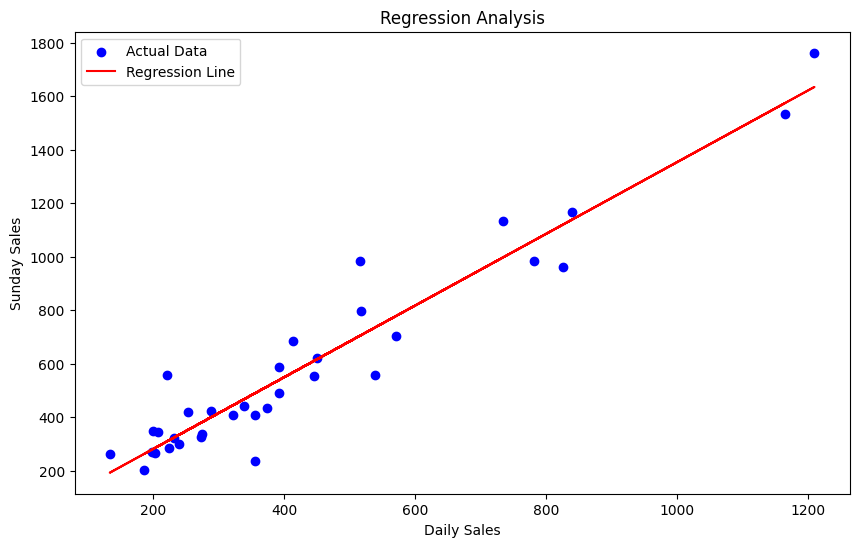

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Load the data from the TSV file
# file_path = 'newspaper_data.tsv'
try:
  df = pd.read_csv('/content/newspaper_data.tsv', sep='\t')  # Load dataset from colab if available else upload
except:
  uploaded = files.upload()
  data = pd.read_csv(io.BytesIO(uploaded['newspaper_data.tsv']), sep='\t')
# data = pd.read_csv(file_path, sep='\t')

# Extract relevant columns using column indices
SNo = np.array(data.iloc[:, 0])
Newspaper = np.array(data.iloc[:, 1])
daily_sales = np.array(data.iloc[:, 2])
sunday_sales = np.array(data.iloc[:, 3])

# Perform linear regression
mean_daily = np.mean(daily_sales)
mean_sunday = np.mean(sunday_sales)
slope = np.sum((daily_sales - mean_daily) * (sunday_sales - mean_sunday)) / np.sum((daily_sales - mean_daily)**2)
intercept = mean_sunday - slope * mean_daily

# Print the final parameter values
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# Identify companies that should not circulate Sunday edition
threshold = 1.3  # 30% increase
companies_to_exclude = [Newspaper[i] for i in range(len(data)) if sunday_sales[i] <= threshold * daily_sales[i]]

# Print the companies to exclude
print("\nCompanies that should not circulate Sunday edition:")
for company in companies_to_exclude:
    print(company)

# Plot the data and regression line
predicted_sunday = slope * daily_sales + intercept
plt.figure(figsize=(10, 6))
plt.scatter(daily_sales, sunday_sales, label='Actual Data', color='blue')
plt.plot(daily_sales, predicted_sunday, label='Regression Line', color='red')
plt.xlabel('Daily Sales')
plt.ylabel('Sunday Sales')
plt.title('Regression Analysis')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

try:
  df = pd.read_csv('/content/cancer.csv')  # Load dataset from colab if available else upload
except:
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['cancer.csv']))

# df = pd.read_csv('/content/cancer.csv')      # Load dataset if cancer.csv is manualy uploaded in colab

attributes = df.drop(["id", "diagnosis"], axis=1)
# data = df.values       # Extract attributes
data = df[['radius_mean', 'texture_mean']].values


def kmeans_clustering(data, k, max_iterations=100):       # K-Means clustering
    np.random.seed(42)
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]
    for _ in range(max_iterations):
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1), axis=-1)     # Assign points to the nearest centroid
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])         # Update centroids
        if np.allclose(centroids, new_centroids):                   # Check convergence
            break
        centroids = new_centroids
    return labels, centroids


def kmedoids_clustering(data, k, max_iterations=100):     # K-Medoids clustering
    np.random.seed(42)
    medoids = data[np.random.choice(range(len(data)), size=k, replace=False)]
    for _ in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - medoids, axis=-1)    # Assign points to the nearest medoid
        labels = np.argmin(distances, axis=-1)
        new_medoids = np.array([data[labels == i][np.argmin(distances[labels == i].sum(axis=-1))] for i in range(k)])               # Update medoids
        if np.allclose(medoids, new_medoids):       # Check convergence
            break
        medoids = new_medoids
    return labels, medoids


# main()

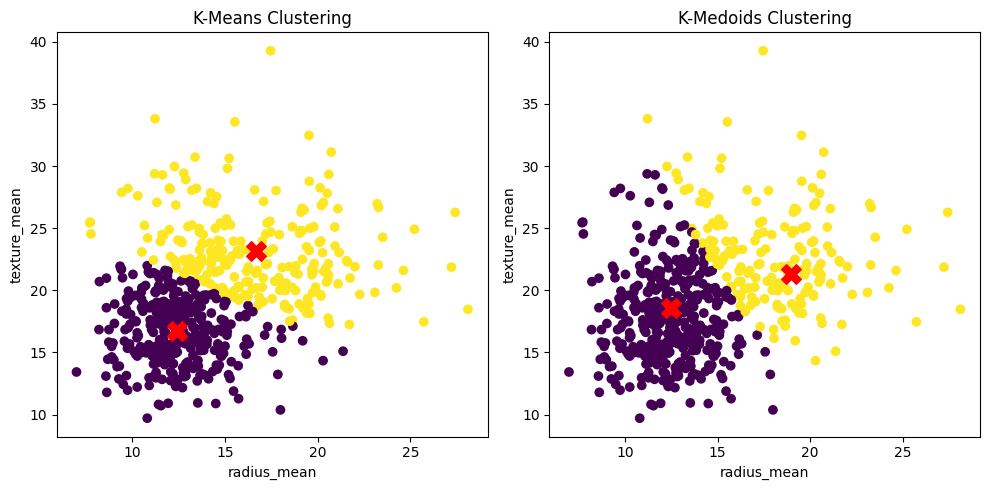


K-Means Cluster Counts:  [340 229]
K-Medoids Cluster Counts:  [399 170]


In [ ]:
kmeans_labels, kmeans_centroids = kmeans_clustering(data, k=2)          # Perform K-Means clustering

kmedoids_labels, kmedoids_medoids = kmedoids_clustering(data, k=2)        # Perform K-Medoids clustering

plt.figure(figsize=(10, 5))           # Plotting the clusters

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='X', color='red', s=200)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Means Clustering')

# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids_medoids[:, 0], kmedoids_medoids[:, 1], marker='X', color='red', s=200)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Medoids Clustering')

plt.tight_layout()
plt.show()

kmeans_cluster_counts = np.bincount(kmeans_labels)
kmedoids_cluster_counts = np.bincount(kmedoids_labels)
print()
print("K-Means Cluster Counts: ",kmeans_cluster_counts)
print("K-Medoids Cluster Counts: ",kmedoids_cluster_counts)